In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nn import io, preprocess, nn
from sklearn.model_selection import train_test_split

# read in sequences

pos_seqs = io.read_text_file('data/rap1-lieb-positives.txt')
neg_seqs = io.read_fasta_file('data/yeast-upstream-1k-negative.fa')

#print(len(pos_seqs), len(neg_seqs))

In [2]:
# preprocess negative to be same length as positive examples

pos_seq_length = len(pos_seqs[0])
negative_examples = preprocess.process_negative_sequences(neg_seqs, pos_seq_length)

#print(len(negative_examples))

In [3]:
# use a balanced sampling scheme of positive and negative to prevent model bias

sequences = pos_seqs + negative_examples
sequences_labels = [True] * len(pos_seqs) + [False] * len(negative_examples)

sampled_seqs, sampled_labels = preprocess.sample_seqs(sequences, sequences_labels)

In [4]:
# one-hot-encoding sequences

X = preprocess.one_hot_encode_seqs(sampled_seqs)
y = np.array(sampled_labels, dtype = int)

In [5]:
# split data into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# define the neural network architecture
nn_arch = [
    {"input_dim": 4 * pos_seq_length, "output_dim": 64, "activation": "relu"},
    {"input_dim": 64, "output_dim": 16, "activation": "sigmoid"}
]

# selected hyperparameters
lr = 0.01
seed = 42
batch_size = 16
epochs = 200
loss_function = "binary_cross_entropy"

nn = nn.NeuralNetwork(nn_arch, lr, seed, batch_size, epochs, loss_function)

In [7]:
# train the neural network
train_loss, val_loss = nn.fit(X_train, y_train, X_val, y_val)

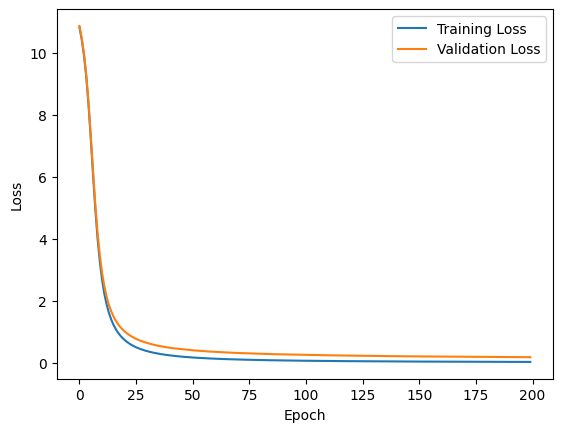

In [8]:
# plot training and validation loss by epoch
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [9]:
# accuracy on the validation data set

y_val_pred = (nn.predict(X_val) > 0.5).astype(int)
accuracy = np.mean(y_val_pred[:, 0] == y_val)
print("Accuracy on the validation dataset:", accuracy)

Accuracy on the validation dataset: 1.0


The loss function used is binary_cross_entropy, which is appropriate for binary classification tasks such as this one. The learning rate is set to 0.01, which is balances convergence speed and stability. The number of epochs is set to 200, which provides sufficient training without overfitting. The batch size is set to 16, allowing the model to train quickly and report an accurate prediction. As shown, loss decreases quickly over the epochs and the accuracy of the prediction is high.